# How to use PolySMILES

In [1]:
#load module
import sys
sys.path.append("polysmiles")
from PolySMILES import PolySMILES
from polymer_graph_helper import draw_chem_graph

# Summary

In [11]:
psm=PolySMILES()

smiles_list=['[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1',
             '[Q]CC([Q: n=3][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1',
             '[Q]CC([Q: n=3][Q: connect = mix]CCO[Q: n=20][H])C1=CC=CC=C1',
             
             "C",
             "CC",
             "CCC",
             "awfds"    # this is an invalid smiles
            ]


psm.auto(smiles_list)

error! 6 awfds


,SMILES,total MW,JR_BoilingPoint,JR_MeltingPoint,JR_CriticalTemp,JR_CriticalPress,JR_CriticalVolume,JR_EnthalpyForm,JR_GibbsEnergy,JR_HeatCapacity,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20...,4025.78,393.251171,198.903297,592.11695,41.223225,328.712799,-31.225576,61.787303,114.900843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,[Q]CC([Q: n=3][Q: connect = block]CCO[Q: n=20]...,1213.676,356.019472,181.672355,530.159268,52.145356,220.306209,-168.637413,-93.690569,81.282295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[Q]CC([Q: n=3][Q: connect = mix]CCO[Q: n=20][H...,1213.676,356.019472,181.672355,530.159268,52.145356,220.306209,-168.637413,-93.690569,81.282295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C,16.043,198.2,122.5,339.383562,60.092543,17.5,68.29,53.88,-4.620864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CC,30.07,245.36,112.3,401.954229,50.299281,147.5,-84.61,-34.04,51.619421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CCC,44.097,268.24,123.57,427.656009,44.091011,203.5,-105.25,-25.62,74.5044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Other useages
- Initiate PolySMILES class
- call "smiles_to_dict" method
    - Returning processed data as a dict object
    - Parse data to yield fragmented repeating units

In [7]:
smiles='[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1'
psm.smiles_to_dict(smiles,calculate_descriptor=False)

{0: {'connect': 'block-block',
  'n': 30.0,
  'SMILES': '[Q]CC(c:1:c:c:c:c:c1)[Q]',
  'mw_unit': 104.15200000000004,
  'type': 'polymeric',
  'mn': 3124.5600000000013},
 1: {'connect': 'block-block',
  'n': 20.0,
  'SMILES': '[Q]CCO[QH]',
  'mw_unit': 45.06100000000001,
  'type': 'polymeric',
  'mn': 901.2200000000001}}

# Calculate descriptors
- RDKit desctiptors are set as default
- Repeating units are capped with "H" for calculation, as default (cap_atom="H")
- NaN will be replaced with zeros, as default (fill_nan=0)

In [9]:
#calculate descriptors as the weight average of each unit
#if molecular weight of the polymer is not given, n will be 50 (default_n=50)
psm.smiles_to_weighted_descriptors(smiles)

{'SMILES': '[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1',
 'total MW': 4025.7800000000016,
 'JR_BoilingPoint': 393.25117070480746,
 'JR_MeltingPoint': 198.90329744794798,
 'JR_CriticalTemp': 592.1169498864748,
 'JR_CriticalPress': 41.22322458310332,
 'JR_CriticalVolume': 328.71279851358,
 'JR_EnthalpyForm': -31.225576161638216,
 'JR_GibbsEnergy': 61.78730313131869,
 'JR_HeatCapacity': 114.90084313122516,
 'JR_EnthalpyVap': 35.91238373184824,
 'JR_EnthalpyFus': 9.287324891077008,
 'JR_LiquidVisco': 0.0007132191906450061,
 'JR_CrystalSolub_1': 24267.91509961089,
 'JR_CrystalSolub_2': 12162.76923467549,
 'JR_AmorphSolub_1': 1595.8839725127139,
 'JR_AmorphSolub_2': 799.8366733737487,
 'MaxEStateIndex': 3.3725511991879005,
 'MinEStateIndex': 0.9405470409875024,
 'MaxAbsEStateIndex': 3.3725511991879005,
 'MinAbsEStateIndex': 0.9405470409875024,
 'qed': 0.49059192863713025,
 'MolWt': 92.71410515726143,
 'HeavyAtomMolWt': 83.53671758019563,
 'ExactMolWt': 92.63837249569768,


# Rules for expressing structures

<img src="pics/polymer_expression.PNG" width=600>

<img src="pics/molecular_weight.PNG" width=300>

# Show graph (under construction)
- As a NetworkX object

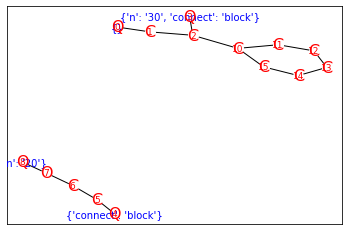

In [10]:
g,_=psm.smiles_to_dict(smiles,graph_mode=True)
draw_chem_graph(g)